In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets

In [4]:
def field_to_cortical(x_vf,y_vf, a=1):
    # Log Polar Mapping AKA log conformal mapping of visual cortex (Schwartz 1980 VR)
    r_vf=np.sqrt(x_vf**2+y_vf**2)
    θ_vf=np.arctan(y_vf/x_vf)
    #w=complex(log(z.'real),z.imag)
    #r=1./(0.065*r+0.054)
    
    r_cortical =  13 * np.log(r_vf+a) # The 13 is fudged to match Motter&Simoni (more or less)

    θ_cortical = θ_vf/(np.pi/2.0)*20.0 # for vertical, follow Horton and Hoyt (1991): seems like 1cm for each 45degrees 
        
    return r_cortical,θ_cortical

def cortical_to_field(x_cortical,y_cortical,a=1):
    r_vf=np.exp(x_cortical/13)-a
    θ_vf=(y_cortical*(np.pi/2))/20

    x_vf=r_vf*np.cos(θ_vf)
    y_vf=r_vf*np.sin(θ_vf)

    return x_vf,y_vf

In [5]:
def mapping_demo(coords):
    # Makes a plot like in the papers (Schwartz, or Motter&Simoni 2007)
    # With visual field on left (degrees) and cortical space on right (mm of cortex)
    f=plt.figure(figsize=(15,10))
    axes=f.subplots(ncols=2)
    axes[0].set_xlim(-10,10)
    axes[0].set_ylim(-10,10)
    axes[1].set_xlabel('Visual field (deg)',size=14)
    
    axes[1].set_xlim(0,40)
    axes[1].set_ylim(-30,30)
    axes[1].set_xlabel('Cortical space (mm)',size=14)
    
    for ncoord,coord1 in enumerate(coords):
        coord_x,coord_y=coord1
        x,y=field_to_cortical(coord_x,coord_y)
        axes[0].plot(coord1[0],coord1[1],'.')
        axes[0].text(coord1[0],coord1[1],ncoord)
        #axes[0].plot(coord1[0],coord1[1],'.')
        axes[1].text(x,y,ncoord)
        axes[1].plot(x,y,'.')
        axes[1].set_xlim(0,10)
        axes[1].set_ylim(-1,20)


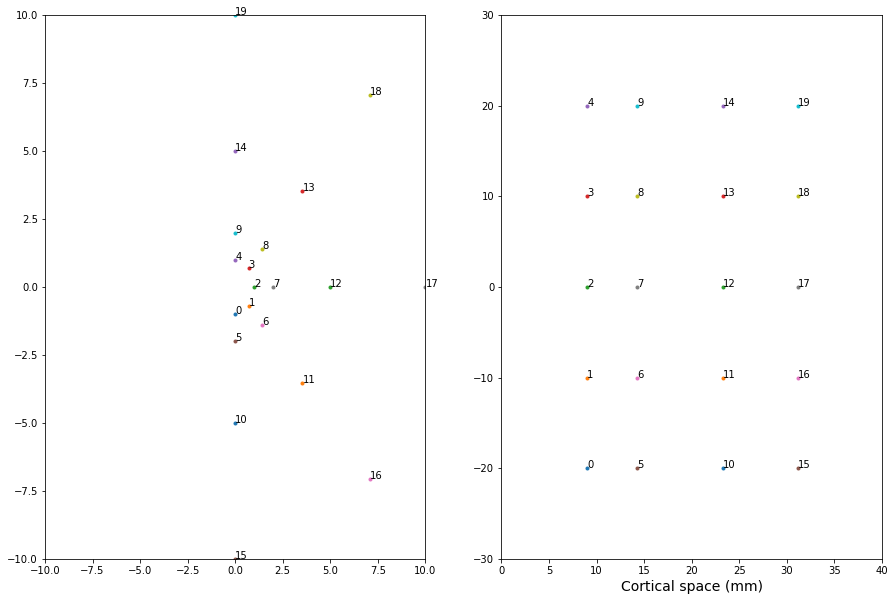

In [9]:
angles=np.linspace(-np.pi/2.0,np.pi/2.0,5)
eccs=[1,2,5,10]
coords=np.array([ (ecc*np.cos(angle1),(ecc*np.sin(angle1))
                                       ) for ecc in eccs for angle1 in angles ] )

mapping_demo(coords)

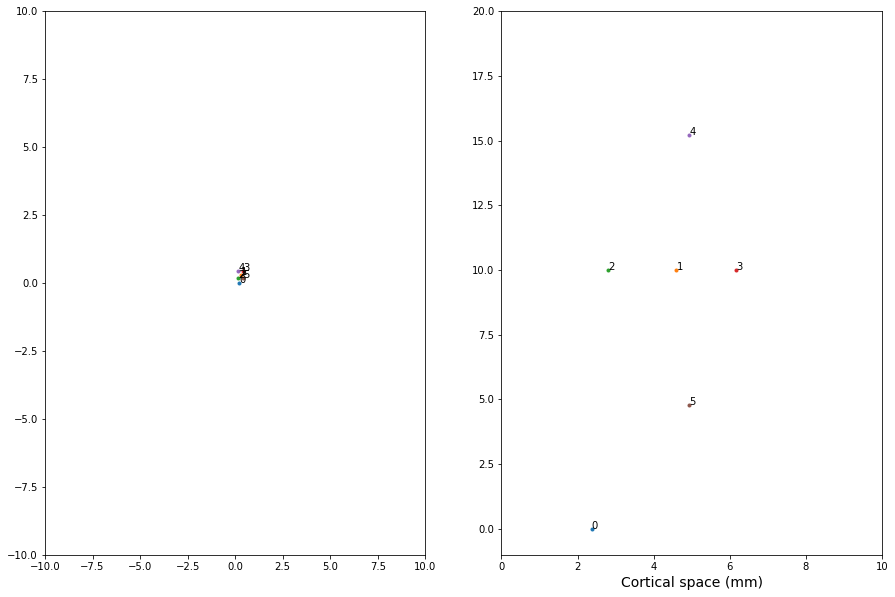

In [441]:
cx,cy=(0.3,0.3) # center of crowded target
spacing=0.13
coords=np.array([(0.2,0),(cx,cy),(cx-spacing,cy-spacing),(cx+spacing,cy+spacing),(cx-spacing,cy+spacing),(cx+spacing,cy-spacing)])
mapping_demo(coords)

# See a bigger inner/outer close the fovea (outer is closer on the retina than inner)

In [ ]:
# Radial tangential flankers for oblique target location
cx,cy=(2,2) # center of crowded target
coords=np.array([(0.2,0),(cx,cy),(cx+1,cy-1),(cx-1,cy+1),(cx-1,cy-1),(cx+1,cy+1)])
mapping_demo(coords)

# See a bigger inner/outer close the fovea (outer is closer on the retina than inner)

### 2D Gaussian: Cortical to visual space

In [52]:
# Function to display 2d gaussians from visual and cortical space
def map_2dgauss(input_array,output_array,plot_first='cortical'):
    numCols=2
    f,axes=plt.subplots(ncols=numCols,figsize=(10,6))
    # TO DO: find an elegant way to do this
    for i in range(numCols):
        if plot_first=='cortical':
            if i==0:
                axes[i].contourf(input_array[0],input_array[1],input_array[2])
                axes[i].set_xlabel("Cortical Space (mm)")
                axes[i].set_title("Cortical Space")
            elif i==1:
                axes[i].contourf(output_array[0],output_array[1],output_array[2])
                axes[i].set_title("Visual Space")
                axes[i].set_xlabel("Visual Space (deg)")
        elif plot_first=='visual':
            if i==0:
                axes[i].contourf(input_array[0],input_array[1],input_array[2])
                axes[i].set_title("Visual Space")
                axes[i].set_xlabel("Visual Space (deg)")
            elif i==1:
                axes[i].contourf(output_array[0],output_array[1],output_array[2])
                axes[i].set_xlabel("Cortical Space (mm)")
                axes[i].set_title("Cortical Space")

def cort_to_VF_single(sigma,cx,cy):
    size=100
    sigma=10**(sigma)
    xlim_cortical,ylim_cortical=[20,20]
    x_cortical = np.linspace(0, xlim_cortical, size)
    y_cortical = np.linspace(0, ylim_cortical, size)
    x, y = np.meshgrid(x_cortical, y_cortical)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx)**2/(2*sigma**2)
        + (y-cy)**2/(2*sigma**2))))
    cortical_array=np.array((x,y,z))
    # 2D gaussin in visual space
    _,xlim_vf=cortical_to_field(xlim_cortical,ylim_cortical)
    _,ylim_vf=cortical_to_field(xlim_cortical,ylim_cortical)
    x_vf = np.linspace(0, xlim_vf, size)
    y_vf = np.linspace(0, ylim_vf, size)
    cx_vf,cy_vf=cortical_to_field(cx,cy)
    x, y = np.meshgrid(x_vf, y_vf)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx_vf)**2/(2*sigma**2)
        + (y-cy_vf)**2/(2*sigma**2))))
    vf_array=np.array((x,y,z))
    map_2dgauss(cortical_array,vf_array,plot_first='cortical')
def cort_to_VF_multiple(cx2):
    sigma=-4
    sigma=10**(sigma)
    cx=[5,8]
    cy=[2,cx2]
    cortical_gauss1=np.zeros((100,100))
    cortical_gauss2=np.zeros((100,100))
    translated_gaussian1=np.zeros((100,100))
    translated_gaussian2=np.zeros((100,100))
    for offsetIdx in range(len(cx)):
        a_cx=cx[offsetIdx]
        a_cy=cy[offsetIdx]
        cx_vf,cy_vf=cortical_to_field(a_cx,a_cy)
        for x in range(100):
            for y in range(100):                   
                    # Tweak x & y before conversion (fudge factor to fix scaling issue)
                    x_tweaked=x/10
                    y_tweaked=y/10
                    sigma_vf=sigma*20
                    # Convert from cortical to VF space
                    x_vf,y_vf=cortical_to_field(x_tweaked,y_tweaked)
                    if offsetIdx==0:
                        # Cortical gaussian
                        cortical_gauss1[y,x]=np.exp(-(((x_tweaked-a_cx)**2)+(y_tweaked-a_cy)**2)/sigma)
                        # VF gaussian
                        translated_gaussian1[y,x]=np.exp(-(((x_vf-cx_vf)**2)+(y_vf-cy_vf)**2)/sigma_vf)
                    elif offsetIdx==1:
                        # Cortical gaussian
                        cortical_gauss2[y,x]=np.exp(-(((x_tweaked-a_cx)**2)+(y_tweaked-a_cy)**2)/sigma)
                        # VF gaussian
                        translated_gaussian2[y,x]=np.exp(-(((x_vf-cx_vf)**2)+(y_vf-cy_vf)**2)/sigma_vf)

    sum_gauss_cortical=cortical_gauss1+cortical_gauss2
    sum_gauss_vf=translated_gaussian1+translated_gaussian2

    map_2dgauss(sum_gauss_cortical,sum_gauss_vf)

def VF_to_cort_single(sigma,cx,cy):
    size=100
    sigma=10**(sigma)
    # 2D gaussian in Visual space
    xlim_vf,ylim_vf=[10,10]
    x_vf = np.linspace(0, xlim_vf, size)
    y_vf = np.linspace(0, ylim_vf, size)
    x, y = np.meshgrid(x_vf, y_vf)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx)**2/(2*sigma**2)
        + (y-cy)**2/(2*sigma**2))))
    vf_array=np.array((x,y,z))
    # 2D gaussin in cortical space
    xlim_cortical,_=field_to_cortical(xlim_vf,ylim_vf)
    ylim_cortical,_=field_to_cortical(6.123233995736766e-17,ylim_vf)
    x_cortical = np.linspace(0, xlim_cortical, size)
    y_cortical = np.linspace(0, ylim_cortical, size)
    cx_cortical,cy_cortical=field_to_cortical(cx,cy)
    x, y = np.meshgrid(x_cortical, y_cortical)
    #x_cortical,y_cortical=[x,y]#field_to_cortical(x,y)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx_cortical)**2/(2*sigma**2)
        + (y-cy_cortical)**2/(2*sigma**2))))
    cortical_array=np.array((x,y,z))
    map_2dgauss(vf_array,cortical_array,plot_first='visual')

def VF_to_cort_multiple(sigma):
    size=100
    sigma=10**(sigma)
    cx=[1,2]
    cy=[1,2]
    for offsetIdx in range(2):
        a_cx=cx[offsetIdx]
        a_cy=cy[offsetIdx]
        if offsetIdx==0:
            # VF gaussian
            xlim_vf,ylim_vf=[10,10]
            x = np.linspace(0, xlim_vf, size)
            y = np.linspace(0, ylim_vf, size)
            x_vf, y_vf = np.meshgrid(x, y)
            z_vf1 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_vf-a_cx)**2/(2*sigma**2)
                + (y_vf-a_cy)**2/(2*sigma**2))))
            # 2D gaussin in visual space
            xlim_cortical,_=field_to_cortical(xlim_vf,ylim_vf)
            ylim_cortical,_=field_to_cortical(6.123233995736766e-17,ylim_vf)
            x = np.linspace(0, xlim_cortical, size)
            y = np.linspace(0, ylim_cortical, size)
            cx_cortical,cy_cortical=field_to_cortical(a_cx,a_cy)
            x_cortical, y_cortical = np.meshgrid(x, y)
            z_cortical1 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_cortical-cx_cortical)**2/(2*sigma**2)
                + (y_cortical-cy_cortical)**2/(2*sigma**2))))
        elif offsetIdx==1:
            # VF gaussian
            xlim_vf,ylim_vf=[10,10]
            x = np.linspace(0, xlim_vf, size)
            y = np.linspace(0, ylim_vf, size)
            x_vf, y_vf = np.meshgrid(x, y)
            z_vf2 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_vf-a_cx)**2/(2*sigma**2)
                + (y_vf-a_cy)**2/(2*sigma**2))))
            # 2D gaussin in visual space
            xlim_cortical,_=field_to_cortical(xlim_vf,ylim_vf)
            ylim_cortical,_=field_to_cortical(6.123233995736766e-17,ylim_vf)
            x = np.linspace(0, xlim_cortical, size)
            y = np.linspace(0, ylim_cortical, size)
            cx_cortical,cy_cortical=field_to_cortical(a_cx,a_cy)
            x_cortical, y_cortical = np.meshgrid(x, y)
            z_cortical2 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_cortical-cx_cortical)**2/(2*sigma**2)
                + (y_cortical-cy_cortical)**2/(2*sigma**2))))

    sum_z_vf=z_vf1+z_vf2
    sum_z_cortical=z_cortical1+z_cortical2

    vf_array=np.array((x_vf,y_vf,sum_z_vf))
    cortical_array=np.array((x_cortical,y_cortical,sum_z_cortical))
    map_2dgauss(vf_array,cortical_array,plot_first='visual')

In [4]:
# Function to display 2d gaussians from visual and cortical space
def map_2dgauss(input_array,output_array,plot_first='cortical'):
    numCols=2
    f,axes=plt.subplots(ncols=numCols,figsize=(10,6))
    # TO DO: find an elegant way to do this
    for i in range(numCols):
        if plot_first=='cortical':
            if i==0:
                axes[i].contourf(input_array[0],input_array[1],input_array[2])
                axes[i].set_xlabel("Cortical Space (mm)")
                axes[i].set_title("Cortical Space")
            elif i==1:
                axes[i].contourf(output_array[0],output_array[1],output_array[2])
                axes[i].set_title("Visual Space")
                axes[i].set_xlabel("Visual Space (deg)")
        elif plot_first=='visual':
            if i==0:
                axes[i].contourf(input_array[0],input_array[1],input_array[2])
                axes[i].set_title("Visual Space")
                axes[i].set_xlabel("Visual Space (deg)")
            elif i==1:
                axes[i].contourf(output_array[0],output_array[1],output_array[2])
                axes[i].set_xlabel("Cortical Space (mm)")
                axes[i].set_title("Cortical Space")

def cort_to_VF_single(sigma,cx,cy):
    size=100
    sigma=10**(sigma)
    xlim_cortical,ylim_cortical=[20,20]
    x_cortical = np.linspace(0, xlim_cortical, size)
    y_cortical = np.linspace(0, ylim_cortical, size)
    x, y = np.meshgrid(x_cortical, y_cortical)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx)**2/(2*sigma**2)
        + (y-cy)**2/(2*sigma**2))))
    cortical_array=np.array((x,y,z))
    # 2D gaussin in visual space
    _,xlim_vf=cortical_to_field(xlim_cortical,ylim_cortical)
    _,ylim_vf=cortical_to_field(xlim_cortical,ylim_cortical)
    x_vf = np.linspace(0, xlim_vf, size)
    y_vf = np.linspace(0, ylim_vf, size)
    cx_vf,cy_vf=cortical_to_field(cx,cy)
    x, y = np.meshgrid(x_vf, y_vf)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx_vf)**2/(2*sigma**2)
        + (y-cy_vf)**2/(2*sigma**2))))
    vf_array=np.array((x,y,z))
    map_2dgauss(cortical_array,vf_array,plot_first='cortical')
def cort_to_VF_multiple(cx2):
    sigma=-4
    sigma=10**(sigma)
    cx=[5,8]
    cy=[2,cx2]
    cortical_gauss1=np.zeros((100,100))
    cortical_gauss2=np.zeros((100,100))
    translated_gaussian1=np.zeros((100,100))
    translated_gaussian2=np.zeros((100,100))
    for offsetIdx in range(len(cx)):
        a_cx=cx[offsetIdx]
        a_cy=cy[offsetIdx]
        cx_vf,cy_vf=cortical_to_field(a_cx,a_cy)
        for x in range(100):
            for y in range(100):                   
                    # Tweak x & y before conversion (fudge factor to fix scaling issue)
                    x_tweaked=x/10
                    y_tweaked=y/10
                    sigma_vf=sigma*20
                    # Convert from cortical to VF space
                    x_vf,y_vf=cortical_to_field(x_tweaked,y_tweaked)
                    if offsetIdx==0:
                        # Cortical gaussian
                        cortical_gauss1[y,x]=np.exp(-(((x_tweaked-a_cx)**2)+(y_tweaked-a_cy)**2)/sigma)
                        # VF gaussian
                        translated_gaussian1[y,x]=np.exp(-(((x_vf-cx_vf)**2)+(y_vf-cy_vf)**2)/sigma_vf)
                    elif offsetIdx==1:
                        # Cortical gaussian
                        cortical_gauss2[y,x]=np.exp(-(((x_tweaked-a_cx)**2)+(y_tweaked-a_cy)**2)/sigma)
                        # VF gaussian
                        translated_gaussian2[y,x]=np.exp(-(((x_vf-cx_vf)**2)+(y_vf-cy_vf)**2)/sigma_vf)

    sum_gauss_cortical=cortical_gauss1+cortical_gauss2
    sum_gauss_vf=translated_gaussian1+translated_gaussian2

    map_2dgauss(sum_gauss_cortical,sum_gauss_vf)

def VF_to_cort_single(sigma,cx,cy):
    size=100
    sigma=10**(sigma)
    # 2D gaussian in Visual space
    xlim_vf,ylim_vf=[10,10]
    x_vf = np.linspace(0, xlim_vf, size)
    y_vf = np.linspace(0, ylim_vf, size)
    x, y = np.meshgrid(x_vf, y_vf)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx)**2/(2*sigma**2)
        + (y-cy)**2/(2*sigma**2))))
    vf_array=np.array((x,y,z))
    # 2D gaussin in cortical space
    xlim_cortical,_=field_to_cortical(xlim_vf,ylim_vf)
    ylim_cortical,_=field_to_cortical(6.123233995736766e-17,ylim_vf)
    x_cortical = np.linspace(0, xlim_cortical, size)
    y_cortical = np.linspace(0, ylim_cortical, size)
    cx_cortical,cy_cortical=field_to_cortical(cx,cy)
    x, y = np.meshgrid(x_cortical, y_cortical)
    #x_cortical,y_cortical=[x,y]#field_to_cortical(x,y)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-cx_cortical)**2/(2*sigma**2)
        + (y-cy_cortical)**2/(2*sigma**2))))
    cortical_array=np.array((x,y,z))
    map_2dgauss(vf_array,cortical_array,plot_first='visual')

def VF_to_cort_multiple(sigma):
    size=100
    sigma=10**(sigma)
    cx=[1,2]
    cy=[1,2]
    for offsetIdx in range(2):
        a_cx=cx[offsetIdx]
        a_cy=cy[offsetIdx]
        if offsetIdx==0:
            # VF gaussian
            xlim_vf,ylim_vf=[10,10]
            x = np.linspace(0, xlim_vf, size)
            y = np.linspace(0, ylim_vf, size)
            x_vf, y_vf = np.meshgrid(x, y)
            z_vf1 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_vf-a_cx)**2/(2*sigma**2)
                + (y_vf-a_cy)**2/(2*sigma**2))))
            # 2D gaussin in visual space
            xlim_cortical,_=field_to_cortical(xlim_vf,ylim_vf)
            ylim_cortical,_=field_to_cortical(6.123233995736766e-17,ylim_vf)
            x = np.linspace(0, xlim_cortical, size)
            y = np.linspace(0, ylim_cortical, size)
            cx_cortical,cy_cortical=field_to_cortical(a_cx,a_cy)
            x_cortical, y_cortical = np.meshgrid(x, y)
            z_cortical1 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_cortical-cx_cortical)**2/(2*sigma**2)
                + (y_cortical-cy_cortical)**2/(2*sigma**2))))
        elif offsetIdx==1:
            # VF gaussian
            xlim_vf,ylim_vf=[10,10]
            x = np.linspace(0, xlim_vf, size)
            y = np.linspace(0, ylim_vf, size)
            x_vf, y_vf = np.meshgrid(x, y)
            z_vf2 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_vf-a_cx)**2/(2*sigma**2)
                + (y_vf-a_cy)**2/(2*sigma**2))))
            # 2D gaussin in visual space
            xlim_cortical,_=field_to_cortical(xlim_vf,ylim_vf)
            ylim_cortical,_=field_to_cortical(6.123233995736766e-17,ylim_vf)
            x = np.linspace(0, xlim_cortical, size)
            y = np.linspace(0, ylim_cortical, size)
            cx_cortical,cy_cortical=field_to_cortical(a_cx,a_cy)
            x_cortical, y_cortical = np.meshgrid(x, y)
            z_cortical2 = (1/(2*np.pi*sigma*sigma) * np.exp(-((x_cortical-cx_cortical)**2/(2*sigma**2)
                + (y_cortical-cy_cortical)**2/(2*sigma**2))))

    sum_z_vf=z_vf1+z_vf2
    sum_z_cortical=z_cortical1+z_cortical2

    vf_array=np.array((x_vf,y_vf,sum_z_vf))
    cortical_array=np.array((x_cortical,y_cortical,sum_z_cortical))
    map_2dgauss(vf_array,cortical_array,plot_first='visual')

In [6]:
slider_max=30
interact(cort_to_VF_single, sigma = widgets.FloatSlider(name='Sigma',value=-1,min=-5, max=2,step=0.25),cx = widgets.FloatSlider(value=0,min=1, max=slider_max,step=1),cy = widgets.FloatSlider(value=0,min=1, max=slider_max,step=1))

interactive(children=(FloatSlider(value=-1.0, description='sigma', max=2.0, min=-5.0, step=0.25), FloatSlider(…

<function __main__.cort_to_VF_single(sigma, cx, cy)>

interactive(children=(FloatSlider(value=0.1, description='cx2', max=2.0, min=0.1, step=0.25), Output()), _dom_…

<function __main__.cort_to_VF_multiple(cx2)>

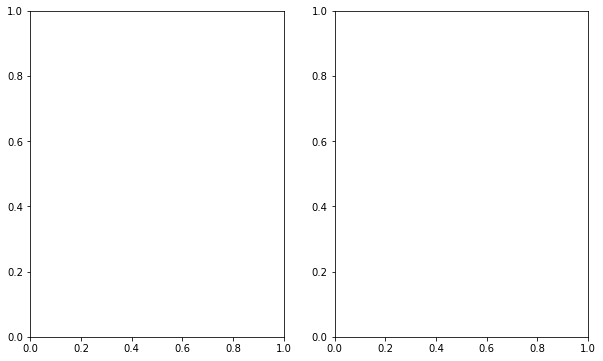

In [130]:
slider_max=2
interact(cort_to_VF_multiple, cx2 = widgets.FloatSlider(name='Sigma',value=0.1,min=0.1, max=2,step=0.25))


### 2D Gaussian: Visual to cortical Space 

In [7]:
slider_max=5
interact(VF_to_cort_single, sigma = widgets.FloatSlider(name='Sigma',value=0.1,min=-4, max=2,step=0.25),cx = widgets.FloatSlider(value=1,min=0.5, max=slider_max,step=0.5),cy = widgets.FloatSlider(value=1,min=0.5, max=slider_max,step=0.5))

interactive(children=(FloatSlider(value=0.1, description='sigma', max=2.0, min=-4.0, step=0.25), FloatSlider(v…

<function __main__.VF_to_cort_single(sigma, cx, cy)>

In [8]:
slider_max=2
interact(VF_to_cort_multiple, sigma = widgets.FloatSlider(name='Sigma',value=-1,min=-2, max=2,step=0.25))


interactive(children=(FloatSlider(value=-1.0, description='sigma', max=2.0, min=-2.0, step=0.25), Output()), _…

<function __main__.VF_to_cort_multiple(sigma)>

## 2D Gaussian: Oculomotor feedback Model

In [84]:
# Function to get x y position for oblique locations
def obliqueLoc_to_xycoord(loc):
    base_and_height=np.sqrt(loc**2/2)
    # we return it twice since x & y are same values
    return base_and_height,base_and_height

# Function to display 2d gaussians from visual and cortical space
def map_2dgauss_cortical(VF_array,feedback_array,combined_array,combined_array_vf):
    numCols=4
    f,axes=plt.subplots(ncols=numCols,figsize=(14,6))
    # Also get x & y for target location of 0.33 deg
    target_x,target_y=[0.2333452377915607,0.2333452377915607]
    target_x_cortical,target_y_cortical=field_to_cortical(target_x,target_y)
    for i in range(numCols):
        if i==0:
            im=axes[i].contourf(VF_array[0],VF_array[1],VF_array[2],cmap='Blues')
            axes[i].text(target_x,target_y,'T',weight='bold',ha='center',va='center')
            axes[i].set_xlabel("Visual Field (deg)")
            axes[i].set_title("Target in VF")
            axes[i].set_xlim(0,0.5)
            axes[i].set_ylim(0,0.5)
        if i==1:
            axes[i].contourf(feedback_array[0],feedback_array[1],feedback_array[2],cmap='Blues')
            axes[i].text(target_x_cortical,target_y_cortical,'T',weight='bold',ha='center',va='center')
            axes[i].set_xlabel("Cortical Space (mm)")
            axes[i].set_title("Oculomotor Feedback")
        elif i==2:
            axes[i].contourf(combined_array[0],combined_array[1],combined_array[2],cmap='Blues')
            axes[i].text(target_x_cortical,target_y_cortical,'T',weight='bold',ha='center',va='center')
            axes[i].set_title("Pooled Model")
            axes[i].set_xlabel("VF in cortical space (mm)")
        elif i==3:
            axes[i].contourf(combined_array_vf[0],combined_array_vf[1],combined_array_vf[2],cmap='Blues')
            axes[i].text(target_x,target_y,'T',weight='bold')
            axes[i].set_xlabel("Visual Field (deg)")
            axes[i].set_title("Output in VF")
            axes[i].set_xlim(0,0.5)
            axes[i].set_ylim(0,0.5)
            # add the bar
            f.colorbar(im)


# Function to generate required arrays and generate plot
def cortical_proprioceptive(targetLocation,sigma_cortical,sigma_vf,saccadeGoal,plot_output=True):
    size=1000
    sigma=10**sigma_cortical
    a_cx,a_cy=saccadeGoal
    # Convert position/offset from VF to cortical space
    a_cx_cortical,a_cy_cortical=field_to_cortical(a_cx,a_cy)
    ### [1]
    # Oculomotor feedback signal/proprioceptive
    xlim_cortical,ylim_cortical=[20,20]
    x_cortical = np.linspace(0, xlim_cortical, size)
    y_cortical = np.linspace(0, ylim_cortical, size)
    x, y = np.meshgrid(x_cortical, y_cortical)
    z1_feedback = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-a_cx_cortical)**2/(2*sigma**2)
        + (y-a_cy_cortical)**2/(2*sigma**2))))
    cortical_array1=np.array((x,y,z1_feedback))

    ### [2]
    # Visual Field in cortical space
    sigma_vf=sigma_vf/8
    cx_vf,cy_vf=targetLocation
    x_cortical = np.linspace(0, xlim_cortical, size)
    y_cortical = np.linspace(0, ylim_cortical, size)
    xmesh_cortical,ymesh_cortical=np.meshgrid(x_cortical,y_cortical)
    cx_cortical,cy_cortical=field_to_cortical(cx_vf,cy_vf)
    z_corticalfromVF=(1/(2*np.pi*sigma*sigma) * np.exp(-((xmesh_cortical-cx_cortical)**2/(2*sigma**2)
                + (ymesh_cortical-cy_cortical)**2/(2*sigma**2))))
    cortical_arrayFromVF=((xmesh_cortical,ymesh_cortical,z_corticalfromVF))

    ### [3]
    # Convert the mesh to VF & compute gaussian
    #x_vf,y_vf=cortical_to_field(x_cortical,y_cortical)
    xmesh_vf,ymesh_vf=cortical_to_field(xmesh_cortical,ymesh_cortical)
    z2_VF_inCorticalSpace = (1/(2*np.pi*sigma_vf*sigma_vf) * np.exp(-((xmesh_vf-cx_vf)**2/(2*sigma_vf**2)
        + (ymesh_vf-cy_vf)**2/(2*sigma_vf**2))))
    cortical_array2=np.array((xmesh_cortical,ymesh_cortical,z2_VF_inCorticalSpace))

    ###[4]
    # We also get a VF array
    VF_array=np.array((xmesh_vf,ymesh_vf,z2_VF_inCorticalSpace))
    # Combined Z values
    combined_gaussian=z1_feedback*z2_VF_inCorticalSpace
    cortical_arrayCombined=((xmesh_cortical,ymesh_cortical,combined_gaussian))
    vf_arrayCombined=((xmesh_vf,ymesh_vf,combined_gaussian))
    # Plot only when needed
    if plot_output==True:
        map_2dgauss_cortical(VF_array,cortical_array1,cortical_arrayCombined,vf_arrayCombined)
    # Return Arrays
    return VF_array,cortical_arrayFromVF,cortical_arrayCombined,vf_arrayCombined,cortical_array1,cortical_arrayFromVF


In [25]:
# We decide whehter or not we require a plot
plot_needed=False
# Also set whether saccade goal is oblique or not
oblique_cond=True
# Also set gaussian parameters
# Based on Hafed 2013: SD for VF is 1 deg @ fovea; SD for SC is 0.75 mm @ fovea
vf_gaussian_sd=1
sc_gaussian_sd=0.75
saccadeGoal=0.33


flankerLocsX_list=[]
flankerLocsY_list=[]
flanker_sequence_list=['target','inner','outer','up','down']*3
spacings=[1.25,1.5,2.5]
spacing_list=np.repeat(spacings,5)
targetLoc=0.33
# We create target list using spacing parameters
targetX,targetY=obliqueLoc_to_xycoord(targetLoc)
# create arrays to be filled within the loop
peak_visualX_list=[]
peak_visualY_list=[]
flankerLocsX_list=[]
flankerLocsY_list=[]
peak_corticalX_In_list=[]
peak_corticalY_In_list=[]
peak_corticalX_Out_list=[]
peak_corticalY_Out_list=[]

for aspacing in spacings:
    spacing_deg=aspacing*(6.25/60)
    flankerLocsX=[targetX,targetX-spacing_deg,targetX+spacing_deg,targetX-spacing_deg,targetX+spacing_deg]
    flankerLocsY=[targetY,targetY-spacing_deg,targetY+spacing_deg,targetY+spacing_deg,targetY-spacing_deg]
    flankerLocsX_list.extend(flankerLocsX)
    flankerLocsY_list.extend(flankerLocsY)

for aLoc in range(len(flankerLocsX_list)):
    testingLoc_x=flankerLocsX_list[aLoc]
    testingLoc_y=flankerLocsY_list[aLoc]
    VF_array,cortical_array,cortical_array_VF=cortical_proprioceptive([testingLoc_x,testingLoc_y],vf_gaussian_sd,sc_gaussian_sd,saccadeGoal,plot_output=plot_needed,oblique_cond=oblique_cond)
    # Get peaks in visual space
    peak_visualX,peak_visualY=getMaxandPeak(VF_array)
    # Get peaks in cortical space
    peak_cortical_xIn,peak_cortical_yIn=getMaxandPeak(cortical_array_VF)
    peak_cortical_xOut,peak_cortical_yOut=field_to_cortical(peak_visualX,peak_visualY)
    # Append values to lists
    peak_visualX_list.append(peak_visualX)
    peak_visualY_list.append(peak_visualY)
    peak_corticalX_In_list.append(peak_cortical_xIn)
    peak_corticalY_In_list.append(peak_cortical_yIn)
    peak_corticalX_Out_list.append(peak_cortical_xOut)
    peak_corticalY_Out_list.append(peak_cortical_yOut)

# Create DF from lists
# Create DF from lists
peak_DF=pd.DataFrame(np.column_stack((flanker_sequence_list,spacing_list,flankerLocsX_list,flankerLocsY_list,peak_visualX_list,peak_visualY_list,peak_corticalX_In_list,peak_corticalY_In_list,peak_corticalX_Out_list,peak_corticalY_Out_list)),\
                    columns=['StimulusType','spacing','X_visualPeakIn','Y_visualPeakIn','X_visualPeakOut','Y_visualPeakOut','X_In_corticalPeak','Y_In_corticalPeak','X_Out_corticalPeak','Y_Out_corticalPeak'])
peak_DF['X_visualPeakIn']=peak_DF['X_visualPeakIn'].astype(float)
peak_DF['Y_visualPeakIn']=peak_DF['Y_visualPeakIn'].astype(float)
peak_DF['X_visualPeakOut']=peak_DF['X_visualPeakOut'].astype(float)
peak_DF['Y_visualPeakOut']=peak_DF['Y_visualPeakOut'].astype(float)
peak_DF['X_In_corticalPeak']=peak_DF['X_In_corticalPeak'].astype(float)
peak_DF['Y_In_corticalPeak']=peak_DF['Y_In_corticalPeak'].astype(float)
peak_DF['X_Out_corticalPeak']=peak_DF['X_Out_corticalPeak'].astype(float)
peak_DF['Y_Out_corticalPeak']=peak_DF['Y_Out_corticalPeak'].astype(float)
peak_DF['spacing']=peak_DF['spacing'].astype(float)


TypeError: cortical_proprioceptive() got an unexpected keyword argument 'oblique_cond'

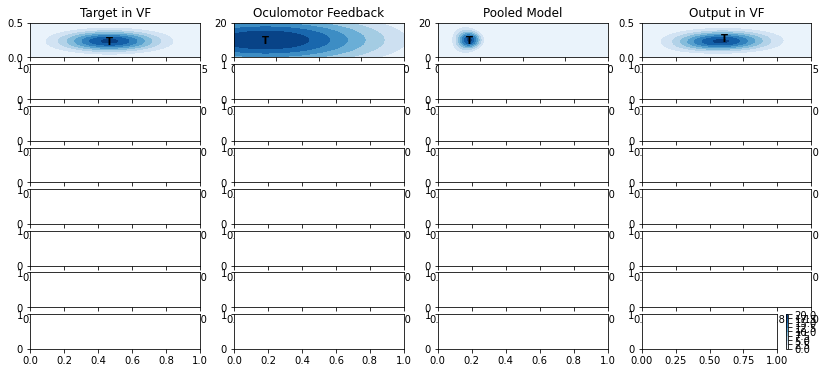

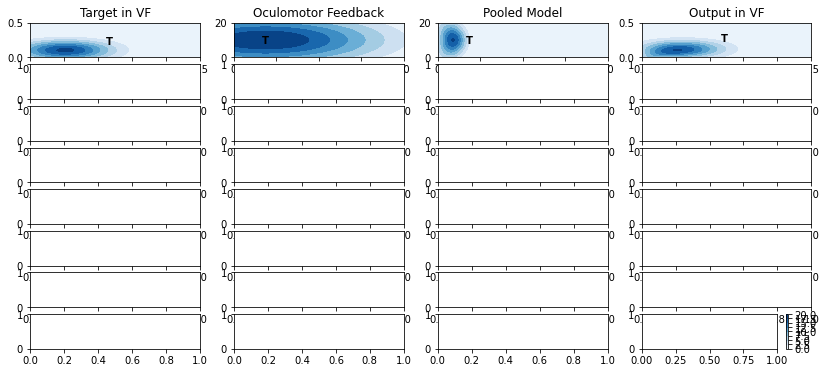

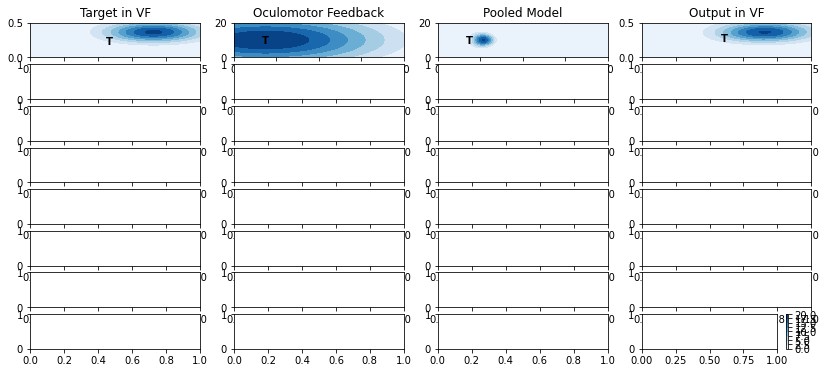

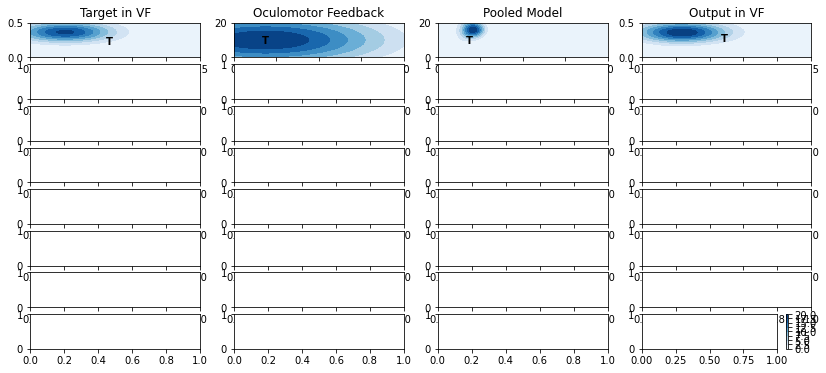

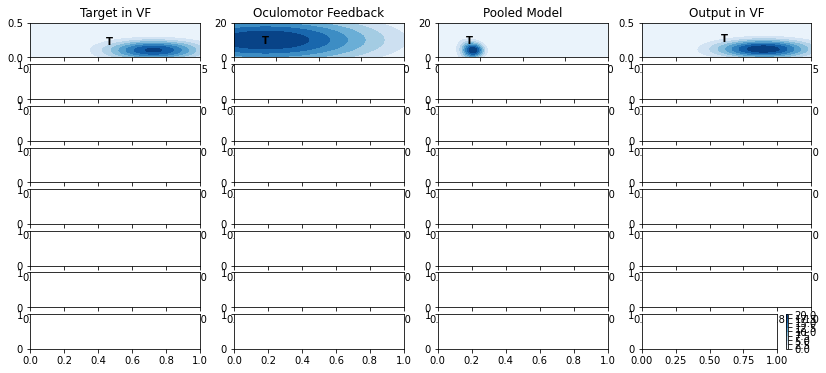

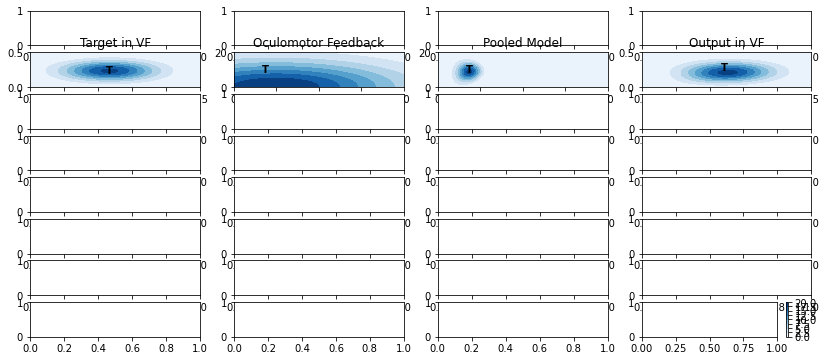

Error in callback <function flush_figures at 0x000002A2BF3C37B8> (for post_execute):


KeyboardInterrupt: 

In [83]:
spacing_deg=1.25*(6.25/60)
targetLoc=0.2333452377915607
# We create target list using spacing parameters
targetX,targetY=[targetLoc,targetLoc]
flanker_sequence_list=['target','inner','outer','up','down']
flankerLocsX=[targetX,targetX-spacing_deg,targetX+spacing_deg,targetX-spacing_deg,targetX+spacing_deg]
flankerLocsY=[targetY,targetY-spacing_deg,targetY+spacing_deg,targetY+spacing_deg,targetY-spacing_deg]

def getMaxandPeak(array):
    indices=np.where(array[2]==np.max(array[2]))
    #Get peaks across different arrays
    peak_visualX=array[0][indices][0]
    peak_visualY=array[1][indices][0]
    
    return peak_visualX,peak_visualY

def plot_VF_space(nrow,ncol,target_x,target_y,cortical_conversion=True,axes=ax):
    if cortical_conversion==True:
        target_x,target_y=field_to_cortical(target_x,target_y)
    im=axes[nrow,ncol].contourf(VF_array[0],VF_array[1],VF_array[2],cmap='Blues')
    axes[nrow,ncol].text(target_x,target_y,'T',weight='bold',ha='center',va='center')
    axes[nrow,ncol].set_xlabel("Visual Field (deg)")
    axes[nrow,ncol].set_title("Target in VF")
    axes[nrow,ncol].set_xlim(0,0.5)
    axes[nrow,ncol].set_ylim(0,0.5)

# Creat an array to be populated in the loop
peak_DF_combined=[]
# We decide whehter or not we require a plot
plot_needed=True
plot_rowIdx=0
# saccade goal condition
horizontal_saccade=[False,True]
for a_sacc_cond in horizontal_saccade:
    # Also set gaussian parameters
    # Based on Hafed 2013: SD for VF is 1 deg @ fovea; SD for SC is 0.75 mm @ fovea
    vf_gaussian_sd=1
    sc_gaussian_sd=0.75
    if a_sacc_cond==True:
        saccadeGoalX,saccadeGoalY=[0.46,sys.float_info.epsilon]
    else:
        saccadeGoalX,saccadeGoalY=[0.2333452377915607,0.2333452377915607]

    # create arrays to be filled within the loop
    peak_visualX_In_list=[]
    peak_visualY_In_list=[]
    peak_visualX_Out_list=[]
    peak_visualY_Out_list=[]
    peak_corticalX_In_list=[]
    peak_corticalY_In_list=[]
    peak_corticalX_Out_list=[]
    peak_corticalY_Out_list=[]

    # we loop through flanker locations
    for aLoc in range(len(flankerLocsX)):
        testingLoc_x=flankerLocsX[aLoc]
        testingLoc_y=flankerLocsY[aLoc]
        VF_array,cortical_array_VF,cortical_array_combined,VF_array_combined,feedback_array,cortical_arrayFromVF=cortical_proprioceptive([testingLoc_x,testingLoc_y],vf_gaussian_sd,sc_gaussian_sd,[saccadeGoalX,saccadeGoalY],plot_rowIdx,plot_output=plot_needed)
        
        # Get peaks in visual space
        peak_visualX_In,peak_visualY_In=getMaxandPeak(VF_array)
        peak_visualX_Out,peak_visualY_Out=getMaxandPeak(VF_array_combined)
        # Get peaks in cortical space
        peak_cortical_xIn,peak_cortical_yIn=getMaxandPeak(cortical_array_VF)
        peak_cortical_xOut,peak_cortical_yOut=field_to_cortical(peak_visualX_Out,peak_visualY_Out)
        # Append values to lists
        peak_visualX_In_list.append(peak_visualX_In)
        peak_visualY_In_list.append(peak_visualY_In)
        peak_visualX_Out_list.append(peak_visualX_Out)
        peak_visualY_Out_list.append(peak_visualY_Out)
        peak_corticalX_In_list.append(peak_cortical_xIn)
        peak_corticalY_In_list.append(peak_cortical_yIn)
        peak_corticalX_Out_list.append(peak_cortical_xOut)
        peak_corticalY_Out_list.append(peak_cortical_yOut)


    # Create DF from lists
    peak_DF=pd.DataFrame(np.column_stack((flanker_sequence_list,peak_visualX_In_list,peak_visualY_In_list,peak_visualX_Out_list,peak_visualY_Out_list,peak_corticalX_In_list,peak_corticalY_In_list,peak_corticalX_Out_list,peak_corticalY_Out_list)),\
                        columns=['StimulusType','X_visualPeakIn','Y_visualPeakIn','X_visualPeakOut','Y_visualPeakOut','X_In_corticalPeak','Y_In_corticalPeak','X_Out_corticalPeak','Y_Out_corticalPeak'])
    peak_DF['X_visualPeakIn']=peak_DF['X_visualPeakIn'].astype(float)
    peak_DF['Y_visualPeakIn']=peak_DF['Y_visualPeakIn'].astype(float)
    peak_DF['X_visualPeakOut']=peak_DF['X_visualPeakOut'].astype(float)
    peak_DF['Y_visualPeakOut']=peak_DF['Y_visualPeakOut'].astype(float)
    peak_DF['X_In_corticalPeak']=peak_DF['X_In_corticalPeak'].astype(float)
    peak_DF['Y_In_corticalPeak']=peak_DF['Y_In_corticalPeak'].astype(float)
    peak_DF['X_Out_corticalPeak']=peak_DF['X_Out_corticalPeak'].astype(float)
    peak_DF['Y_Out_corticalPeak']=peak_DF['Y_Out_corticalPeak'].astype(float)
    peak_DF['spacing']=1.25

    # We also get ratio of radii in VF and cortical space
    #VF ratio of r
    peak_DF['r_VFIn']=np.sqrt((peak_DF.X_visualPeakIn.iloc[0]-peak_DF.X_visualPeakIn)**2+(peak_DF.Y_visualPeakIn.iloc[0]-peak_DF.Y_visualPeakIn)**2)
    peak_DF['r_VFOut']=np.sqrt((peak_DF.X_visualPeakOut.iloc[0]-peak_DF.X_visualPeakOut)**2+(peak_DF.Y_visualPeakOut.iloc[0]-peak_DF.Y_visualPeakOut)**2)
    peak_DF['r_VF_ratio']=peak_DF['r_VFOut']/peak_DF['r_VFIn']
    #Cortical ratio of r
    peak_DF['r_corticalIn']=np.sqrt((peak_DF.X_In_corticalPeak.iloc[0]-peak_DF.X_In_corticalPeak)**2+(peak_DF.Y_In_corticalPeak.iloc[0]-peak_DF.Y_In_corticalPeak)**2)
    peak_DF['r_corticalOut']=np.sqrt((peak_DF.X_Out_corticalPeak.iloc[0]-peak_DF.X_Out_corticalPeak)**2+(peak_DF.Y_Out_corticalPeak.iloc[0]-peak_DF.Y_Out_corticalPeak)**2)
    peak_DF['r_cortical_ratio']=peak_DF['r_corticalOut']/peak_DF['r_corticalIn']

    # We assign DF to resp array
    if a_sacc_cond==True:
        peak_DF['saccadeGoal']='Horizontal_awayFromTarget'
    else:
        peak_DF['saccadeGoal']='Oblique_toTarget'
    # combine arrays
    peak_DF_combined.append(peak_DF)
    #increment row idx
    plot_rowIdx+=1
peak_DF_combined=pd.concat(peak_DF_combined)

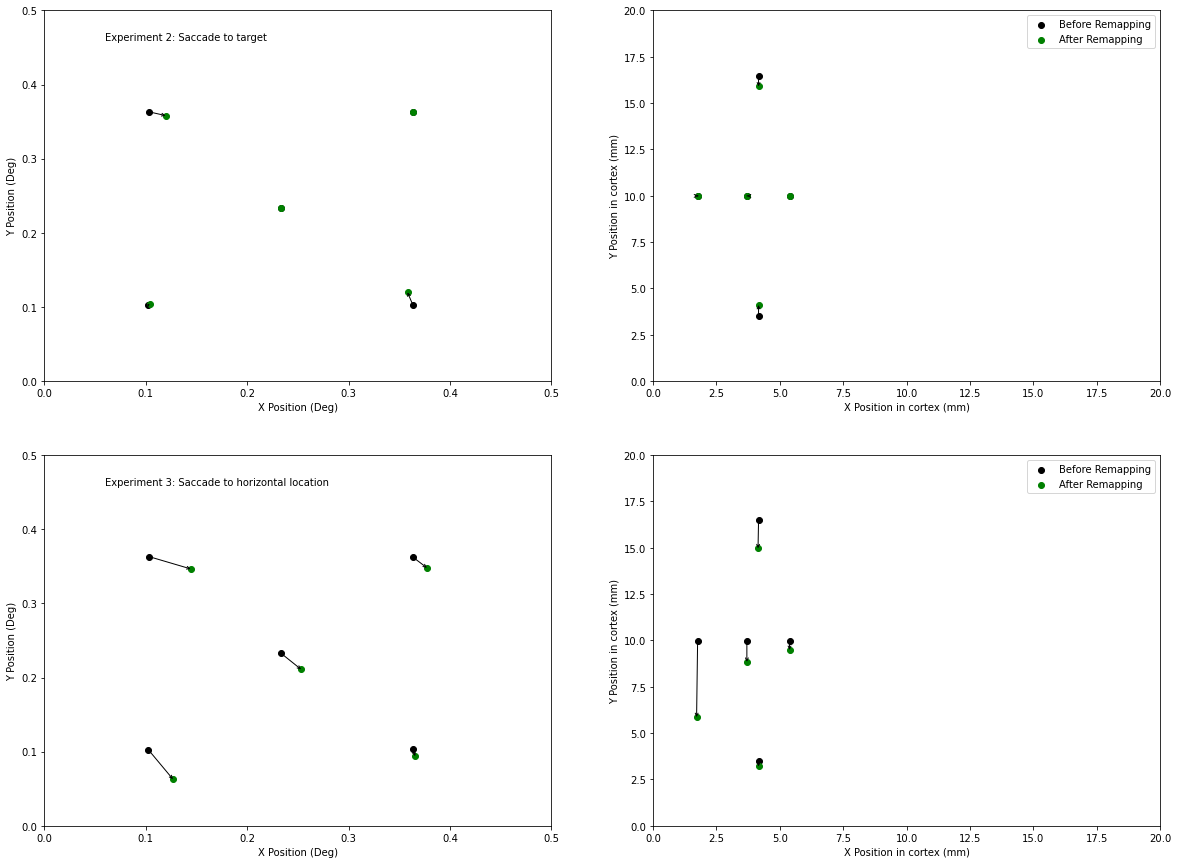

In [77]:
f,axs=plt.subplots(2,2,figsize=(20,15))
sacc_conds=['Oblique_toTarget', 'Horizontal_awayFromTarget']

rowCounter=0
for row in axs:
    a_cond=sacc_conds[rowCounter]
    peak_DF=peak_DF_combined.query("saccadeGoal==@a_cond")
    colCounter=0
    for col in row:
        if colCounter==0:
            col.scatter(peak_DF['X_visualPeakIn'],peak_DF['Y_visualPeakIn'],color='k',label='Before Remapping',marker='o')
            col.scatter(peak_DF['X_visualPeakOut'],peak_DF['Y_visualPeakOut'],color='g',label='After Remapping',marker='o')
            col.set_xlabel("X Position (Deg)")
            col.set_ylabel("Y Position (Deg)")

            for i in range(len(peak_DF)):
                a_startX=peak_DF['X_visualPeakIn'][i]
                a_startY=peak_DF['Y_visualPeakIn'][i]
                a_endX=peak_DF['X_visualPeakOut'][i]
                a_endY=peak_DF['Y_visualPeakOut'][i]

                col.annotate('',xy=(a_startX,a_startY),xytext=(a_endX,a_endY),fontsize=7,\
                    arrowprops=dict(edgecolor='black', arrowstyle = '<-',shrinkA=0,shrinkB=0))
            col.set_xlabel("X Position (Deg)")
            col.set_ylabel("Y Position (Deg)")
            col.set_xlim(0,0.5)
            col.set_ylim(0,0.5)
            if rowCounter==0:
                col.text(0.06,0.46,"Experiment 2: Saccade to target")
            else:
                col.text(0.06,0.46,"Experiment 3: Saccade to horizontal location")

        #Cortical Plot
        else:
            col.scatter(peak_DF['X_In_corticalPeak'],peak_DF['Y_In_corticalPeak'],color='k',label='Before Remapping')
            col.scatter(peak_DF['X_Out_corticalPeak'],peak_DF['Y_Out_corticalPeak'],color='g',label='After Remapping')

            col.legend(bbox_to_anchor=(1,1))
            col.set_xlabel("X Position (Deg)")
            col.set_ylabel("Y Position (Deg)")

            for i in range(len(peak_DF)):
                a_startX=peak_DF['X_In_corticalPeak'][i]
                a_startY=peak_DF['Y_In_corticalPeak'][i]

                a_endX=peak_DF['X_Out_corticalPeak'][i]
                a_endY=peak_DF['Y_Out_corticalPeak'][i]

                col.annotate('',xy=(a_startX,a_startY),xytext=(a_endX,a_endY),fontsize=7,\
                    arrowprops=dict(edgecolor='black', arrowstyle = '<-',shrinkA=0,shrinkB=0))

            col.set_xlabel("X Position in cortex (mm)")
            col.set_ylabel("Y Position in cortex (mm)")
            col.set_xlim(0,20)
            col.set_ylim(0,20)

        colCounter+=1
    rowCounter+=1


In [78]:
peak_DF_combined[['r_corticalIn','r_corticalOut','saccadeGoal','StimulusType']]

r_corticalIn  r_corticalOut                saccadeGoal StimulusType
0      0.000000       0.000000           Oblique_toTarget       target
1      1.941942       1.921922           Oblique_toTarget        inner
2      1.681682       1.681682           Oblique_toTarget        outer
3      6.502809       5.923829           Oblique_toTarget           up
4      6.482840       5.903870           Oblique_toTarget         down
0      0.000000       0.000000  Horizontal_awayFromTarget       target
1      1.941942       3.581402  Horizontal_awayFromTarget        inner
2      1.681682       1.799576  Horizontal_awayFromTarget        outer
3      6.502809       6.141939  Horizontal_awayFromTarget           up
4      6.482840       5.664392  Horizontal_awayFromTarget         down

In [79]:
peak_DF_combined.query("StimulusType!='target'").groupby(['saccadeGoal','StimulusType'])['r_cortical_ratio'].mean()

saccadeGoal                StimulusType
Horizontal_awayFromTarget  down            0.873752
                           inner           1.844237
                           outer           1.070105
                           up              0.944505
Oblique_toTarget           down            0.910692
                           inner           0.989691
                           outer           1.000000
                           up              0.910965
Name: r_cortical_ratio, dtype: float64

In [80]:
peak_DF_combined.query("StimulusType!='target'").groupby(['saccadeGoal','StimulusType'])['r_VF_ratio'].mean()

saccadeGoal                StimulusType
Horizontal_awayFromTarget  down            0.884365
                           inner           1.055209
                           outer           1.006330
                           up              0.943774
Oblique_toTarget           down            0.918176
                           inner           0.990434
                           outer           1.000000
                           up              0.918403
Name: r_VF_ratio, dtype: float64